# PHAS0007 Computing Unit 4: Linear regression

Authors: Ben Waugh, Louise Dash, Becky Chislett

Last updated 2022-10-23

## Learning objectives

By the end of this session, you should be able to:
- use Python to fit a straight line to a set of data;
- present data, calculations and discussion in a well formatted computational notebook.

## Introduction

In this unit we will see how to fit a straight line to a set of data, applying the techniques you have learned in the Data Analysis and Statistics (DAS) lectures [1]. You will present your calculation and results, as well as the data itself, in a Jupyter notebook.

You should refer to the notes and slides from the DAS course for explanation of the theory of linear regression, and of how to choose the appropriate level of precision to use in quoting numerical results. 

## Presenting numbers

### Format specifiers

Many of you will have noticed that Python's default number output doesn't always present data the way you expect or the way you want. Now we'll look at how we can customize how the data is output to the screen:

In [1]:
# here are some numbers
num_1 = 4.65467453905654
num_2 = -828.06548098432

# print with a defined number of decimal places: floating point numbers (f):
print(f"num_1 is {num_1:0.3f} to 3 decimal places.")
print(f"num_2 is {num_2:0.4f} to 4 decimal places.")

num_1 is 4.655 to 3 decimal places.
num_2 is -828.0655 to 4 decimal places.


- The `f` before the string marks it as an **f-string** (technically a "formatted string literal", meaning it contains expressions in curly brackets `{}` that should be replaced when the code is run.
- The variable names within the curly brackets are replaced by the values of the corresponding variables.
- The colon `:` marks what follows as a **format specifier**, which tells Python how to present the corresponding value.
- The format specifier, e.g. `0.3f` has four parts:
  - The first (`0`) is the (minimum) **width**: if we want to line up numbers in a table we might want to pad each one with spaces to take up a certain width, but here we use 0 because we don't want extra space.
  - The second (`.`) is just a separator between the width and the next field.
  - The third (`3`) is the **precision**, in this case the number of decimal places to print.
  - The fourth (`f`) is the **type**: `f` means "fixed point".

On other occasions we might want to use `e`, for exponential/scientific format, or `d`, for (decimal) integer numbers. For example:


In [2]:
num_3 = 146.23
num_4 = 42
num_5 = 3.6589543805434e-8

print(f"num_3 to 4dp is {num_3:0.4f} (extra zeros added automatically).")
print(f"  or rounded to an integer (0dp) it is {num_3:0.0f}.")
print(f"num_4 really is an integer: {num_4:d}.")
print(f"num_5 is best in exponential format: {num_5:0.2e}.")
print(f"We can put num_5 in f format {num_5:0.10f}")
print(f"  but you need enough digits otherwise you just get {num_5:0.6f}.")

num_3 to 4dp is 146.2300 (extra zeros added automatically).
  or rounded to an integer (0dp) it is 146.
num_4 really is an integer: 42.
num_5 is best in exponential format: 3.66e-08.
We can put num_5 in f format 0.0000000366
  but you need enough digits otherwise you just get 0.000000.


Many other options are described in the [Python string documentation](https://docs.python.org/3/library/string.html#formatstrings).

### Why is this useful here?

Remember, when dealing with data you should quote all uncertainties in your results to one significant figure (usually) or at most two (often appropriate if the first significant figure is 1, or if the uncertainty is an important part of the analysis), and then give your measured or calculated value to the same precision (see section 5.6 of the [PHAS0007 Data Analysis Booklet](https://moodle.ucl.ac.uk/course/view.php?id=31679)).

However, if you want to do further calculations with your results, you should always use the numbers at their full calculated precision - hence the best general rule is to **_quote_ your results to 1 or 2 significant figures in the uncertainty, but always _calculate_ with the full number** to avoid any rounding errors.

In any case, you will need to output your result to full precision at some point in order to determine how many significant figures are required.

So if, for example, you've calculated your least-squares fit line to have a slope of 3.1234567 +/- 0.0043543, you should quote the result as 3.123 +/- 0.004 (not forgetting appropriate units, of course!)

Remember though, you can't use LaTeX-style formatting in a python `print()` statement, only ASCII (or if you really feel the need, Unicode) characters. It's fine to use "^" to represent a superscript and "+/-" for $\pm$, etc,  in print statements.

### Adding text to your plot

When you do your own least squares fit line, you're going to want to output the slope and intercept (together with their uncertainties) either as text output with a print statement, like above, or on the plot itself.

To put a text string with formatted numbers directly on your plot, you'll need to work out roughly the x- and y- coordinates where you want the text to start, then use a command like this:

    plt.text(x, y, f"y = {slope:0.4f} x + {intercept:0.4f}")

You'll need to change `x` and `y` to the numbers corresponding to the position on the plot where you want the text, and will probably need to tweak them to get the position exactly right. Make sure the text isn't obscuring anything on the plot!

## Linear regression

The separate notebook on [Fitting a Function to Data](https://moodle.ucl.ac.uk/mod/resource/view.php?id=4527144) provides a worked example of fitting a straight line (and other functions) to a set of data. Here we will provide only a short overview of the procedure. As usual we start by importing the packages we will need.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Then we can use the NumPy `polyfit` function to carry out the straight-line fit.

In [4]:
# Fields are x, y, (error on y).
# Data generated using a simple artifical simulation, and have no units.
x, y, dy = np.loadtxt('unit4data.csv',delimiter=',',unpack=True)

# Fit straight line parameters and calculate errors
# A straight line is a polynomial of degree 1.
degree = 1
# Note: to correctly take errors into account,
#   - set weights with w=1/error
#   - use cov='unscaled'
# See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
coeffs, errors = np.polyfit(x,y,degree,w=1/dy,cov='unscaled')
m, c = coeffs  # unpack gradient and intercept from output
dm, dc = np.sqrt(np.diag(errors)) # errors are sqrt of diagonal terms

# Present results with errors
print(f"m = {m:.2f} +- {dm:.2f}")
print(f"c = {c:.2f} +- {dc:.2f}")

m = 2.22 +- 0.17
c = 0.25 +- 0.08


The data were in fact generated using a simulation with a gradient of 2.1 and an intercept of 0.3, so we have successfully reconstructed these values (within the expected precision) from the data. Let's plot both the "true" line used to generate the data, and the best fit line we have reconstructed.

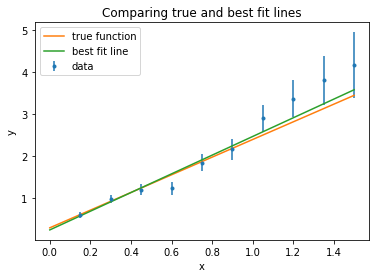

In [5]:
# Calculate coordinates to plot true function
m_true, c_true = 2.1, 0.3
xline = np.array([0,1.5])
yline_true = m_true * xline + c_true
yline_rec  = m * xline + c

# Set up graph
plt.figure()
plt.title("Comparing true and best fit lines")
plt.xlabel("x")
plt.ylabel("y")

# Plot data and lines
plt.errorbar(x,y,yerr=dy,fmt='.',label="data")
plt.plot(xline,yline_true,'-',label='true function')
plt.plot(xline,yline_rec,'-',label='best fit line')
plt.legend()

What happens if we don't use the errors, and carry out an unweighted fit?

In [6]:
# Fit straight line parameters and calculate errors
# Still using degree 1, but no weights.
coeffs_uw, errors_uw = np.polyfit(x,y,degree,cov=True)
m_uw, c_uw = coeffs_uw  # unpack gradient and intercept from output
dm_uw, dc_uw = np.sqrt(np.diag(errors_uw)) # errors are sqrt of diagonal terms

# Present results with errors
print(f"m = {m_uw:.2f} +- {dm_uw:.2f}")
print(f"c = {c_uw:.2f} +- {dc_uw:.2f}")

m = 2.74 +- 0.16
c = -0.03 +- 0.15


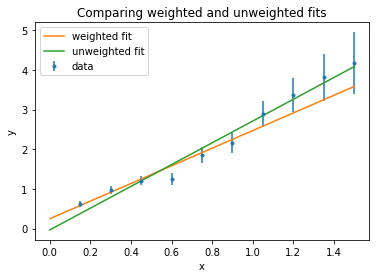

In [7]:
# Calculate coordinates to plot unweighted fit
yline_uw  = m_uw * xline + c_uw

# Set up graph
plt.figure()
plt.title("Comparing weighted and unweighted fits")
plt.xlabel("x")
plt.ylabel("y")

# Plot data and lines
plt.errorbar(x,y,yerr=dy,fmt='.',label="data")
plt.plot(xline,yline_rec,'-',label='weighted fit')
plt.plot(xline,yline_uw,'-',label='unweighted fit')
plt.legend()

## Goodness of fit

To ascertain whether our data is actually well described by the straight line we have fitted to it, we can take various approaches, as described in more detail in the DAS booklet [1].
- look at the graph with the line and the points with error bars;
- plot the residuals (or normalised residuals);
- calculate the $r^2$ statistic;
- calculate the normalised $\chi^2$ statistic.

Do you think the data above is well described by a straight line? What difference does it make using a weighted rather than unweighted fit?

## Assessed task for this unit

### Background to the data

The data you will fit comes from an experiment carried out by the PHAS0007 module leader, Dr Jasvir Bhamrah. She was testing Hooke's Law by measuring the length of a spring with different masses attached to it. Hooke's Law states that
    
$$F = k x$$
    
where $F$ is the tension in the spring, $x$ is the extension of the spring, and $k$ is the spring constant of the spring. Hence $k$ can be calculated from the gradient of a graph of extension vs the weight applied to the spring.

### Important note

#### Citation
    
If you reuse code from another source, for example the session script, your own submission from a previous session, or a post on stackoverflow, you **must** make sure you clearly state the original source in the comments, and summarise any changes that you have made. 

It is **not acceptable** to copy code from other sources without citation and attribution.
    
This applies to both session tasks and formal assignments.

#### Examples

For example, in the task today you are asked to adapt code from your earlier work, so include a comment in your code such as:

    # Plotting code adapted from my submission for PHAS0007 Unit 3

If you use or adapt code from someone else it is of course also important to acknowledge this, e.g. with a comment like

    # script in this cell is from http://blog.nextgenetics.net/?e=102
      
You should **always** do this when reusing code from other sources - it is both academic good practice and useful to remind you where you found something.

### Instructions

1. Create a new notebook.
1. Write code (you can adapt it from your work in the previous unit) to read in and plot the data from the file `spring.csv`. Check the data file itself to find out the quantities in each column and their units. Make sure that the code reads the data file from the same directory that your notebook is in. Don't make any changes to the data file itself.
1. Use the function `np.polyfit` to find the best-fit line to the data
  1. first, without using the errors, i.e. an unweighted fit;
  1. then using the errors, i.e. a weighted fit.
1. You can refer to the notebook provided, and adapt code from it if you wish.
1. In each of the unweighted and weighted cases:-
  1. Output, at full precision, your calculated values for the slope, the intercept, and their uncertainties, together with their units and an appropriate text string.
  1. Plot the fitted straight line on the same plot as the data.
  1. Use Python number formatting to output, at the appropriate precision for quoting your results, your calculated slope and intercept, and the uncertainty on each. You can do this either
    - in your plot itself, using `plt.text()`; or
    - in a `print()` output in the same code cell as your plot (this is a bit easier, if you are short of time).
1. Comment in a text cell on the differences (if any) between the results of the weighted and unweighted fits.
1. Use your results to calculate the spring contant $k$ of the spring used in the experiment, printing the result and its uncertainty to the appropriate precision. You can use a value of $g = 9.81 ms^{-2}$ for the acceleration due to gravity.

### Reminders

- Use text cells to explain what you're doing as you go along, including:
  - a title and brief introduction;
  - a brief conclusion.
- Include comments in code cells where appropriate, including:
  - any necessary explanation of the code;
  - citation of any copied or adapted code.
- Consider how best to present the graphs: the checklists in the notes for unit 3 may be useful.

## References

[1] Llorente-Garcia I and Jones P. *Data Analysis and Statistics Booklet, Practical Physics and Computing 1: Module PHAS0007.* [online] UCL: London; 2021 [Accessed 23 September 2022]. Available from: https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305408